# 23/1/27 (금요일)

In [1]:
#폰트가져오기 -외부폰트사용하기

import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt


# Add every font at the specified location
font_dir = ['C:/python/fonts'] #폰트 설치 안하고 파일에 넣어 주기만 하면됨
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname = font).get_name()) #이름확인
    font_manager.fontManager.addfont(font) #추가

    
# Set font family globally
mpl.rcParams['font.family'] = 'Gugi'
print(mpl.rcParams['font.family'])

Gugi
['Gugi']


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

penguins = sns.load_dataset('penguins')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
#연습
# penguins.isnull().sum()

#선생님코드
len(penguins) - penguins.count()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
#describe()
##DF의 요약 정보를 한눈에 파악 가능

penguins.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

In [5]:
#pandas any(), all()복습
##any : 차원축소함수, 해당하는 열/행에 하나의 값이라도 True면 True반환
##all : 차원축소함수, 해당하는 열/행값이 모두 True면 True반환

#연습 -> 내코드
# penguins.any(axis = 1)
# penguins[(penguins['bill_length_mm'] == "") | (penguins['bill_depth_mm'] == "") ]
penguins[penguins.isnull( ).any(axis=1)]
# [(len(penguins) - penguins.count()).any(axis=1)]
# len(penguins) - penguins.count()


#다른방법
penguins[penguins.isnull().sum(axis = 1) > 0]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN  
339          NaN  NaN

In [6]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [7]:
#연습
##성별처리
##숫자 자료형 칼럼과 다르게 통계치로 대체 불가해 삭제가 바람직함

penguins.dropna(subset=["sex"], inplace=True)

penguins[penguins.isna().any(axis = 1)]

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []

In [8]:
#연습
A = penguins.apply(lambda r: 1 if  r.species == "Adelie" else 0, axis = 1)

C = penguins.apply(lambda r: 1 if  r.species == "Chinstrap" else 0, axis = 1)

G = penguins.apply(lambda r: 1 if  r.species == "Gentoo" else 0, axis = 1)
#칼럼추가
penguins["Adlie"] = A
penguins["Chinstrap"] = C
penguins["Gentoo"] = G
penguins





#다른방법
##for문 사용

# spicies_values = pgs["species"].unique()

# for s ons species_values:
#     pgs[s] = (pgs["species"] == s).astype("int")

    
# pgs[pgs["species"] == "Adelie"][["Adelie", "Chinstrap", "Gentoo"]].value_counts()
# pgs[pgs["species"] == "Chinstrap"][["Adelie", "Chinstrap", "Gentoo"]].value_counts()
# pgs[pgs["species"] == "Gentoo"][["Adelie", "Chinstrap", "Gentoo"]].value_counts()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  Adlie  Chinstrap  Gentoo  
0         3750.0    Male      1          0       0  
1         3800.0  Female      1          0       0  
2         3250.0  Female      1          0       0  
4         3450.0  Female      1          0       0  
5         3650.0    Male      1          0       0  
..           ...     ...    ...        ...     ...  
338       4925.0  Female      0          0       1  
340       4850.0  Female      0          0       1  
341       5750.0    Male      0          0       1  
342       5200.0  Female      0          0       1  
343       5400.0    Male      0          0       1  

[333 rows x 10 columns]

# Seaborn

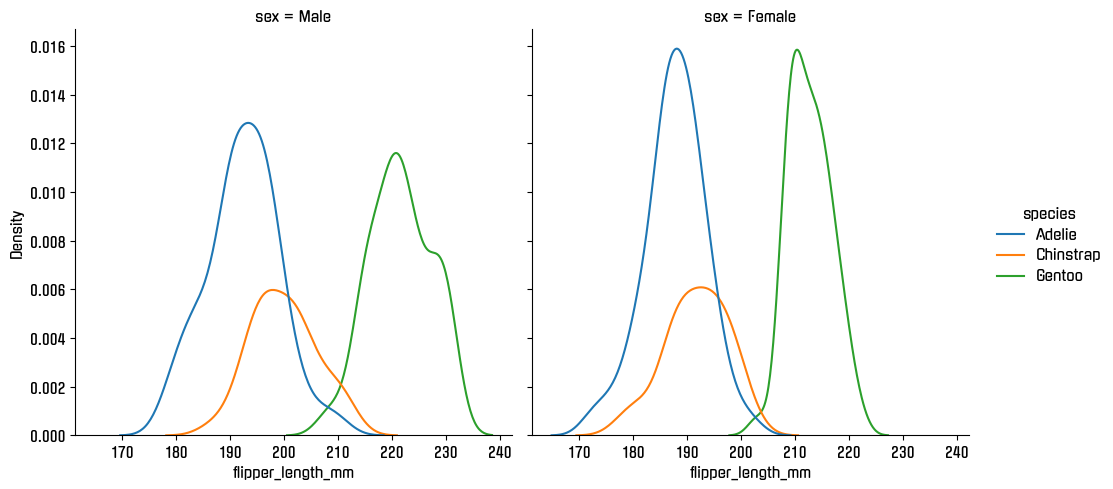

In [19]:
#displot()
##col로 그래프 나누기 : subset을 한번 더 분류 가능
##이전 예제보다 subset을 더 나눔 - >col에 sex칼럼 레이블 설정해서
%matplotlib inline

sns.displot(data = penguins, x = 'flipper_length_mm', hue='species', col = "sex", kind = "kde")

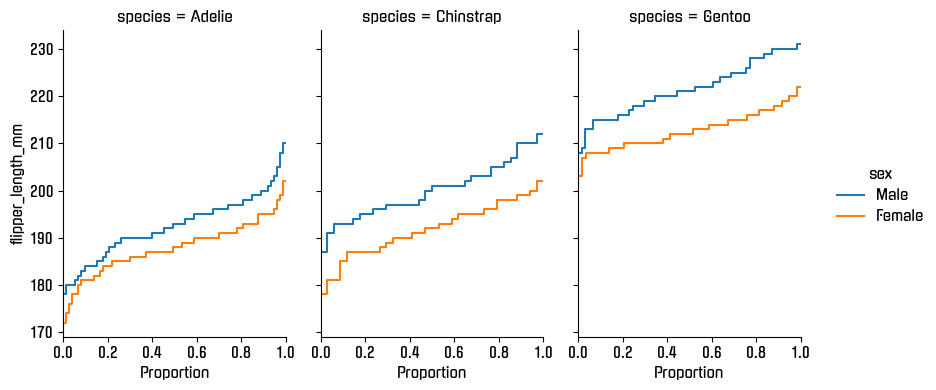

In [20]:
#그래프크기설정
##height와 aspect를 활용
##height : inches
##aspect : height * inches(높이 대비 너비 비율을 지정한다 생각하기)

sns.displot(
    data = penguins, y = 'flipper_length_mm', hue='sex', col = "species",
    kind = "ecdf", height = 4, aspect = .7,
)

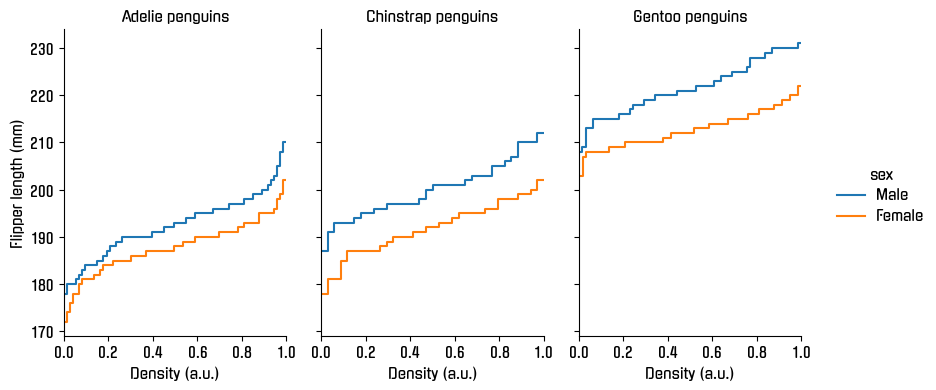

In [21]:
#col로 그래프 나누기
##각 axis label, title도 지정가능
## axis label : set_axis_labels(xlabel, ylabel)메서드
## title : set_titles(), formatting keys인 {col_var}와 {col_name}을 조합해 포맷팅

q = sns.displot(
    data = penguins, y = 'flipper_length_mm', hue='sex', col = "species",
    kind = "ecdf", height = 4, aspect = .7,
)

q.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
q.set_titles("{col_name} penguins")

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

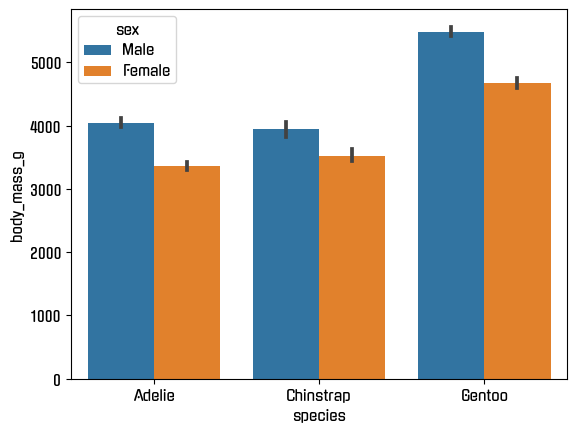

In [25]:
#barplot
##x와 hue를 카테고리화해서 body_mass_g값의 평균과 신뢰구간을 구해서 바플롯으로 표현
df = sns.load_dataset("penguins")
sns.barplot(data=df, x = "species", y = "body_mass_g", hue = "sex")

In [26]:
#박스-휘스커 플롯(Box-Whisker Plot) or 박스플롯
##박스와 박스 바깥선으로 구성
## Q1:1사분위수
## Q3:3사분위수
## Q3 - Q1 = IQR(3사분위수와 1사분위수의 차이)
###내부 가로선 : 중앙값
###외부 세로선은 -> 1사분위 수보다 1.5*IQR만큼 낮은 값, 3사분위 수보다 1.5*IQ만큼 높은 값의 구간을 기준으로 가장큰 데이터와 작은데이터를 잇는 선분
###바깥 점 : 아웃라이어(일일히 점으로 표시)


<AxesSubplot:xlabel='age'>

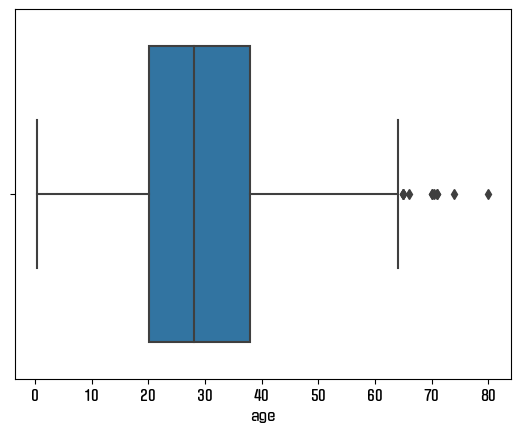

In [27]:
#박스플롯
df = sns.load_dataset("titanic")
sns.boxplot(x = df["age"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:xlabel='age', ylabel='class'>

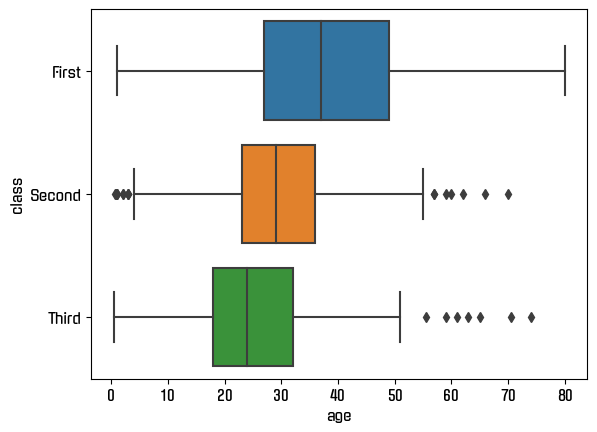

In [29]:
##타이타닉 class칼럼의 dtype은 카테고리
##카테고리화된 칼럼 하나를 분류값으로 추가하기 위해 y키워드 인수 설정
##y축 기준으로 카테고르별 박스플롯을 유니크한 벨류의 개수만큼 나눠서 얻을 수 있음
df.info()
sns.boxplot(data = df, x = "age", y = "class")

<AxesSubplot:xlabel='age', ylabel='class'>

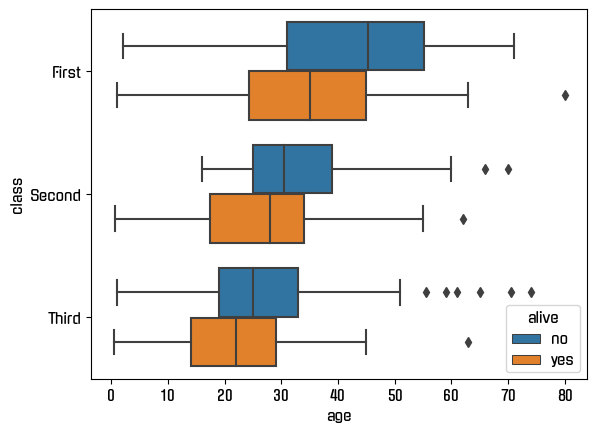

In [30]:
##x에 할당한 값에 대한 분포 구하기
##y와 hue에 전달된 칼럼을 기준으로 그룹화한 결과 -> 박스플롯
sns.boxplot(data = df, x = "age", y = "class", hue = "alive")

<AxesSubplot:xlabel='fare', ylabel='alive'>

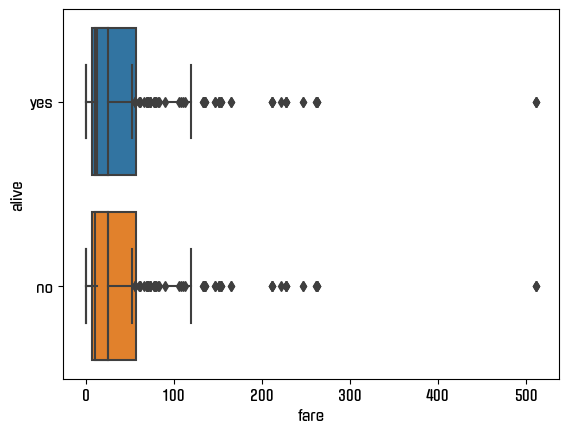

In [34]:
##박스플롯을 그렸는데 여러개로 출력된 그래프의 순서가 맘에들지 않는경우
##order키워드 인수 사용
##order키워드 인수로 전달할 값을 리스트 형태로 작성
##원하는 차례대로 ticklabel을 적으면 됨

sns.boxplot(data = df, x = "fare", y = "alive")

#위 플롯 순서바꾸기
sns.boxplot(data = df, x = "fare", y = "alive", order = ['yes', 'no'])

<AxesSubplot:>

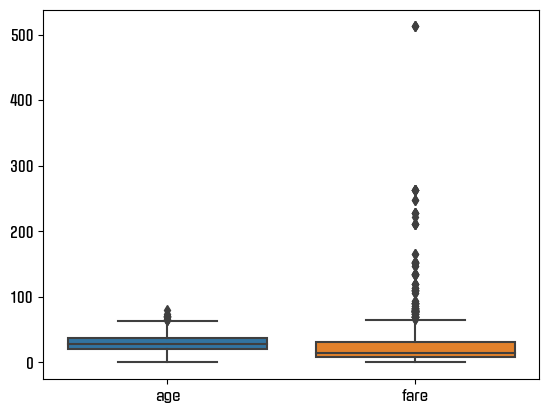

In [38]:
##수치값을 갖는 칼럼 여럿을 동시에 하나의 박스플롯에 표현
##data키워드 인수로 DF를 전달 시 그래프로 표현하고 싶은 수치값을 갖는 칼럼들을 인덱싱해 DF형태로 전달하면 됨
##방향을 바꾸고 싶을 때 : orient키워드 인수에 h(수평), v(수직)값 주기
sns.boxplot(data = df[["age","fare"]], orient = "v")

In [39]:
#violinplot()
##box plot과 ked 둘을 콤비네이션한 그래프
##바이올린 모양처럼 생김
##세로 방향으로 kde모양을 그림 -> kde가 좌우 대칭되게 그려짐
##규칙은 box and whisker plot과 비슷
##카테고리 칼럼을 가지고 데이터의 분포를 나란히 그림
##그래프들의 분포 비교에 적합
##(참고)샘플사이즈에 따라 분포에 영향이 있을 수 있음

<AxesSubplot:xlabel='age'>

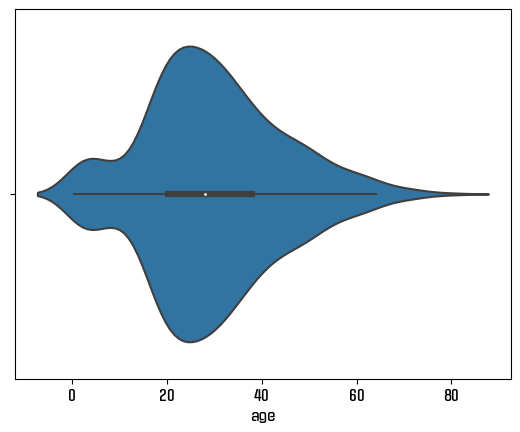

In [40]:
##x키워드 인수만 값을 시리즈로 할당해 그리기
##시리즈 값으로 그래프 그리면 기본적으로 수평방향
sns.violinplot(x = df["age"])

<AxesSubplot:xlabel='age', ylabel='class'>

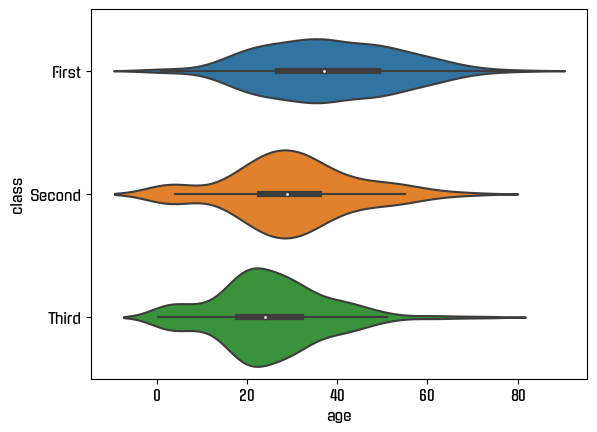

In [41]:
##카테고리 dtype을 갖는 클래스칼럼을 활용해 y축값 설정
##각 카테고리마다 갖는 데이터 분포를 y축 기준으로 분리해 그릴 수 있음
##x축에 수평하게 그래프를 그려냄
sns.violinplot(data = df, x = "age", y = "class")

<AxesSubplot:xlabel='class', ylabel='age'>

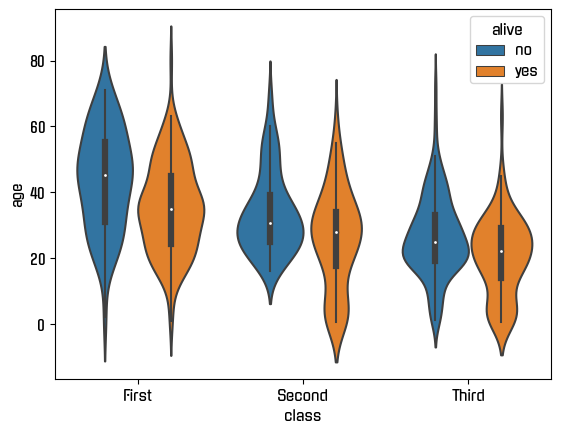

In [42]:
##x키워드 인수에 카테고리 자료형 설정
##방향 바뀜
sns.violinplot(data = df, x = "class", y = "age", hue="alive")

<AxesSubplot:xlabel='deck', ylabel='age'>

C:\Users\playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


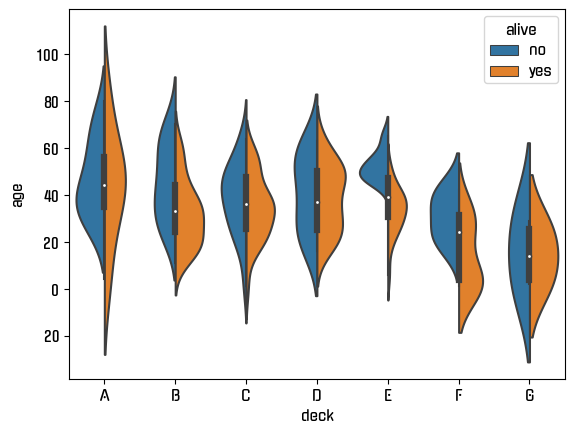

In [44]:
##hue에 설정한 alive 칼럼값에 따라 좌/우측 분포를 그리기
##split 키워드 인수에 True값 전달 하는 조건 ->  hue에 설정된 값의 level이 단 두개여야함
##hue에 설정된 alive값이 yes, no 단 두개여서 split 키워드 인수에 True설정 가능
##level이 2개가 아닐 때 -> 에러발생

sns.violinplot(data = df, x = "deck", y = "age", hue="alive", split = True)

In [45]:
##level이 2개가 아닐 때 -> 에러발생
sns.violinplot(data = df, x = "deck", y = "age", hue="class", split = True)

ValueError: There must be exactly two hue levels to use `split`.'

<AxesSubplot:xlabel='age', ylabel='alive'>

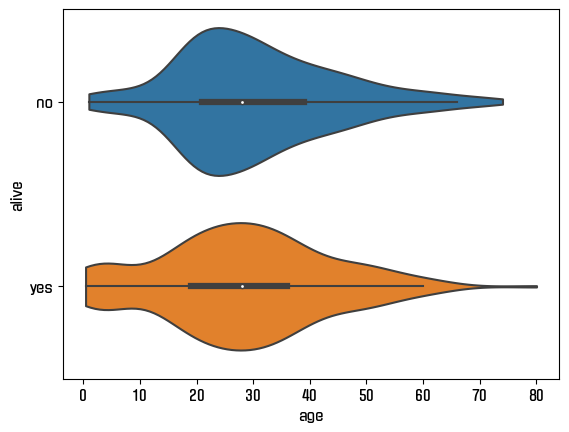

In [46]:
##바이올린 플롯 범위 제한
# 나이의 경우 0미만의 범위에 대한 그래프
# ...........


##값의 표현 범위를 명확히 하기 : cut 키워드 인수 사용
##cut키워드 인수에 0값을 작성 -> 가지고 있는 데이터의 범위를 초과
##0 이외의 실수 값을 입력하면 대역폭의 크기가 됨
#0밑으로는 값 안나오게 해줌
sns.violinplot(data = df, x = "age", y = "alive", cut = 0)

<AxesSubplot:xlabel='age', ylabel='alive'>

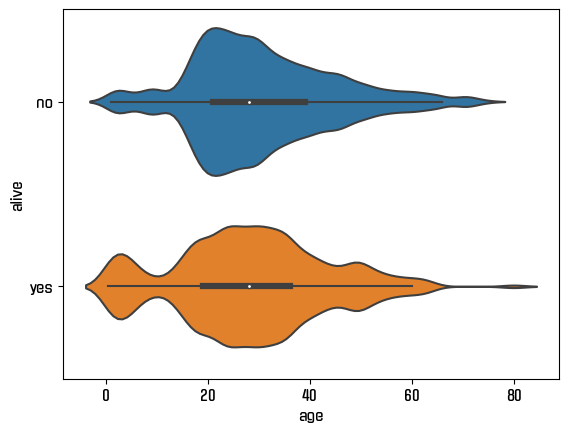

In [47]:
##kde 그래프 모양을 부드럽게 처리하다보면 대역폭 커짐
##이를 줄이기 위해  : bw 키워드 인수에 소수값을 갖는 비율 설정
#bw = bandwidth
sns.violinplot(data = df, x = "age", y = "alive", bw = .15)

<AxesSubplot:xlabel='age', ylabel='embark_town'>

C:\Users\playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


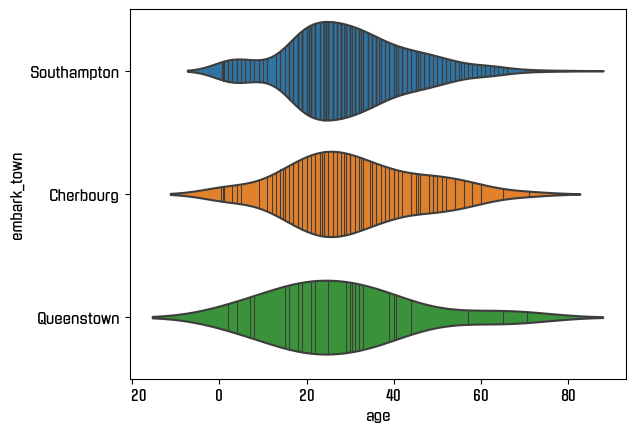

In [48]:
##내부에 데이터 분포를 직접 표현 가능
##inner 키워드 인수에 stick 값 전달
##데이터의 분포를 그래프 안에 표현
sns.violinplot(data = df, x = "age", y = "embark_town", inner = "stick")

<AxesSubplot:xlabel='age', ylabel='embark_town'>

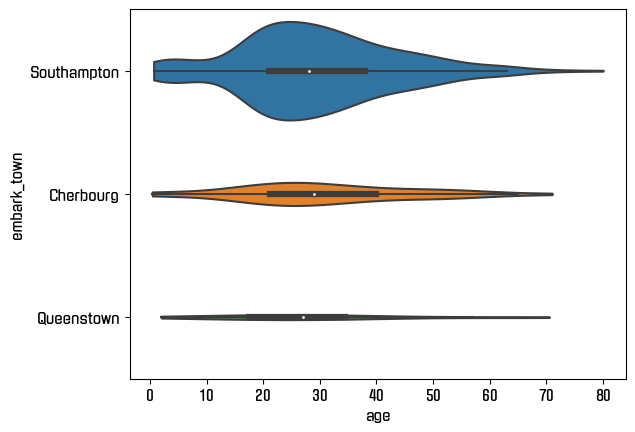

In [49]:
##scale에 따라 그래프 크기 달라짐
##scale은 area, count, width의 값 지정 가능 - 기본값area
##area : 바이올린의 영역 너비가 같게 그려짐
##count : 실제 갖는 데이터 개수에 따라 바이올린의 크기 달라짐
##width : 바이올린이 동일한 폭
sns.violinplot(data = df, x = "age", y = "embark_town", scale = "count", cut = 0)

In [50]:
#stripplot()
##카테고리마다 scatter plot을 그림
##그리는 방식 : jitter사용
##jitter : 다른 축의 방향으로 랜덤하게 점을 찍어 겹치는 부분 줄임
##박스플로과 바이올린플롯의 보완이 될 수 있음

<AxesSubplot:xlabel='total_bill'>

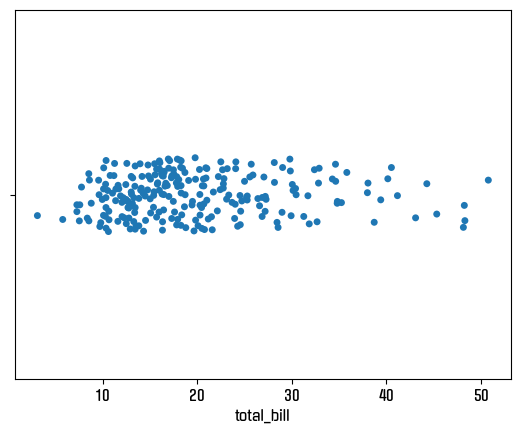

In [51]:
##단 하나의 숫자형 칼럼을 할당한 경우 -> 각 점들이 다른 축의 방향으로 랜덤하게 jittered된 단일 변량에 대한 분포의 형태
tips = sns.load_dataset("tips")



<AxesSubplot:xlabel='total_bill', ylabel='day'>

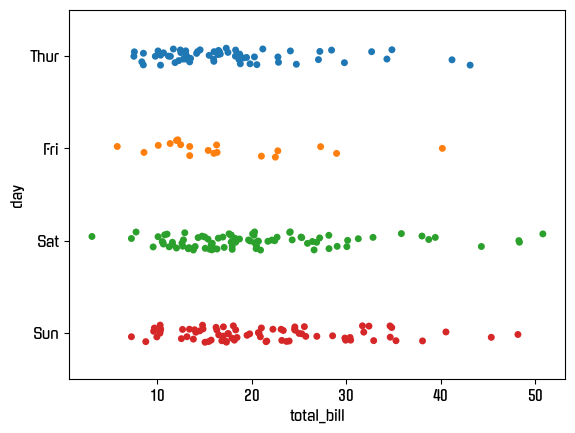

In [52]:
##y축 방향에 카테고리 변량 추가
##카테고리에 해당되는 데이터들의 분포형태 비교
sns.stripplot(data=tips, x = "total_bill", y="day")


<AxesSubplot:xlabel='day', ylabel='total_bill'>

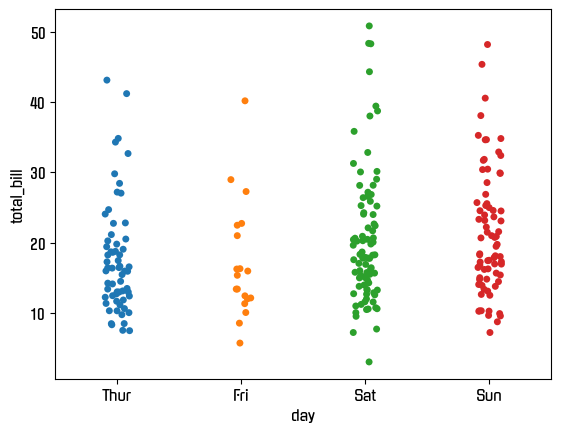

In [53]:
##x축 카테고리 타입을 y축에 숫자 타입 데이터 설정 시 앞 예제와 대조되는 버티컬한 모양
sns.stripplot(data=tips, x = "day", y="total_bill")


<AxesSubplot:xlabel='total_bill', ylabel='day'>

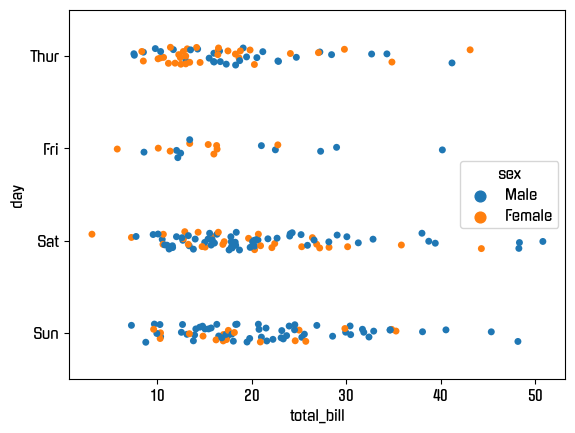

In [54]:
##hue키워드 인수를 추가해 변량 하나 더 추가
##분류 개수가 더 늘어 그래프 쉽게 파악에 도움
sns.stripplot(data=tips, x = "total_bill", y="day", hue = "sex")


<AxesSubplot:xlabel='total_bill', ylabel='day'>

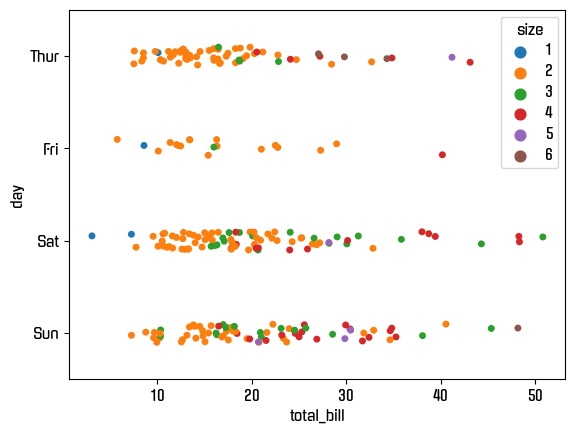

In [56]:
##이산형 숫자 타입의 데이터를 갖는 칼럼도 지정 가능
sns.stripplot(data=tips, x = "total_bill", y="day", hue = "size") #size는 식사인원


<AxesSubplot:xlabel='total_bill', ylabel='day'>

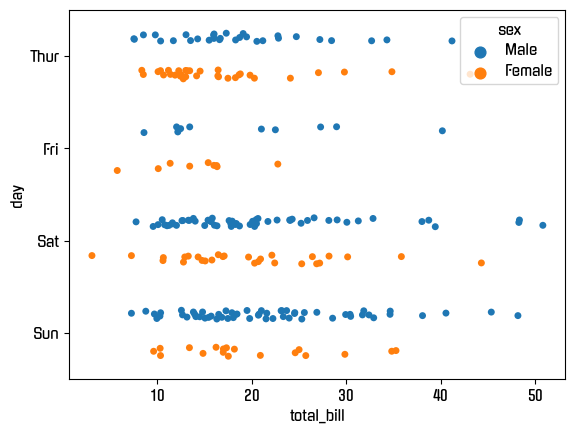

In [57]:
##dodge = True 키워드 인수로 hue로 나눈 카테고리 값을 완전히 분리해 그래프
sns.stripplot(data=tips, x = "total_bill", y="day", hue = "sex", dodge = True)


In [58]:
#swarmplot()
##stripplot과 매우 흡사
##데이터를 마커로 표현할 때 절대 겹치지 않게 표현
##strip : 다른 축의 방향으로 랜덤하게 찍을 뿐 겹치게도 찍음)
##정확한 데이터 분포를 표현하기엔 좋음
##아주 큰 스케일 데이터를 표현할땐 너비가 너무 넓어져 적합하지 않음

<AxesSubplot:xlabel='total_bill'>

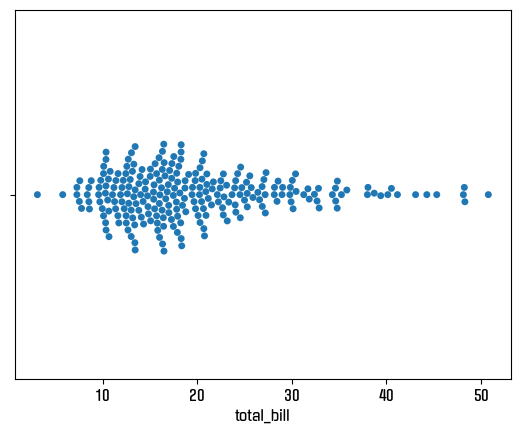

In [59]:
##숫자값을 갖는 데이터의 단일 변량 분포 표현
##데이터 마커가 서로 겹치지 않게 표현
sns.swarmplot(data=tips, x ="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

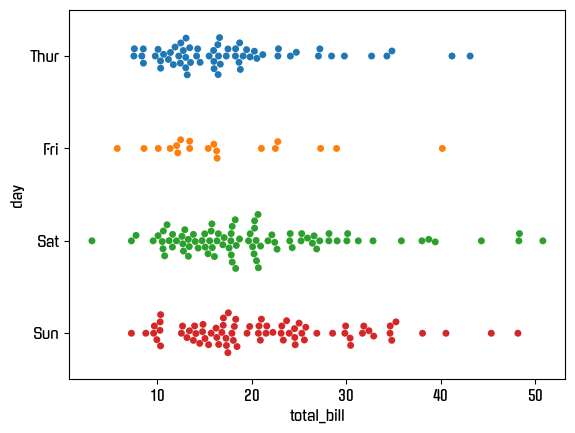

In [60]:
##y값에 카테고리 자료형을 갖는 칼럼 추가
##카테고리마다 swarm플랏으로 쪼갬
##예제는 각 요일별 총 지출액에 대한 분포

sns.swarmplot(data=tips, x ="total_bill", y = "day")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

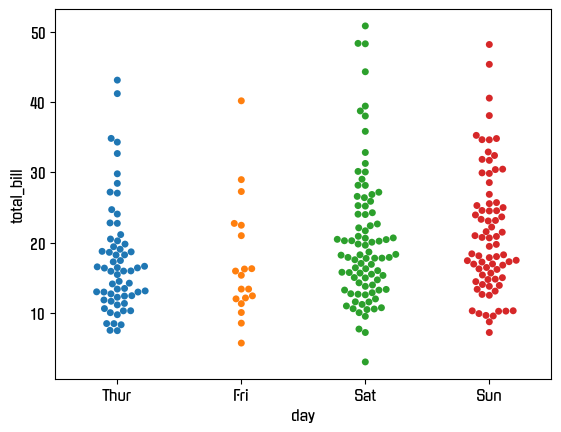

In [61]:
##버티컬 방향으로 표현 : x값에 카테고리 자료형, y값에 숫자형 데이터 설정
##직전 예제와는 반대
sns.swarmplot(data=tips, x ="day", y = "total_bill")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

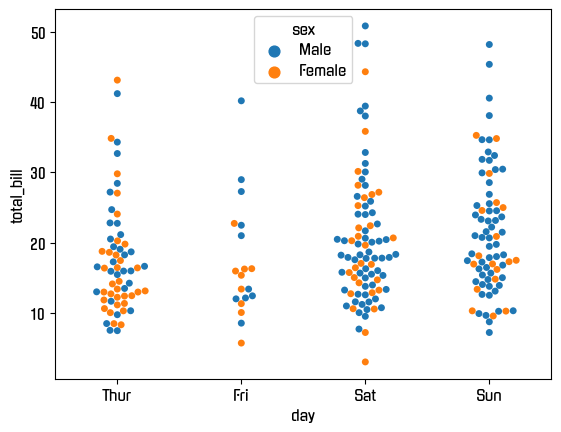

In [62]:
##hue키워드 인수 추가해 변량 하나 더 추가 가능
sns.swarmplot(data=tips, x ="day", y = "total_bill", hue = "sex")

C:\Users\playdata\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

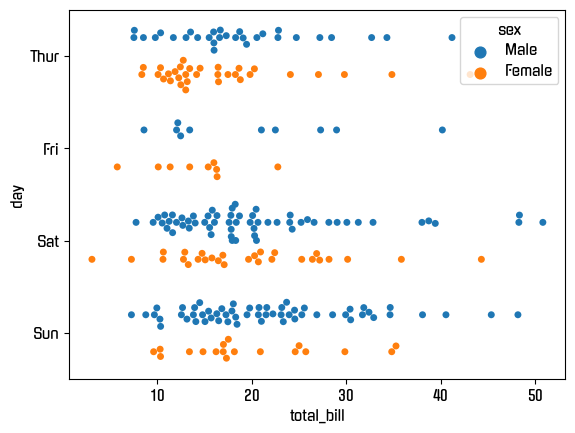

In [63]:
##dodge = True키워드 인수를 통해 hue로 나눈 카테고리 값을 완전히 분리
##swarm은 데이터가 충분하지 않으면 표현에 생략된 마케 발생
sns.swarmplot(data=tips, x ="total_bill", y = "day", hue = "sex", dodge = True)

C:\Users\playdata\anaconda3\lib\site-packages\seaborn\categorical.py:1378: UserWarning: You passed a edgecolor/edgecolors ('#3d3d3d') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(swarm_data, cat_pos, s=s, **kws)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

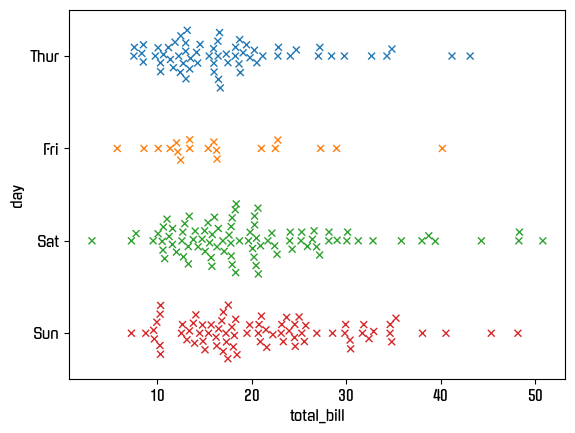

In [66]:
##scatter()메서드의 키워드 인수를 작성 -> 사용자가 원하는 시각적 효과를 커스텀
sns.swarmplot(
    data=tips, x ="total_bill", y = "day",
    marker = "x", linewidth=1,
)

In [67]:
#catplot()
##axes-level(row, col)까지 분류를 나눌 수 있음
##카테고리화를 더 세분화해 작업 가능
##kind 키워드 인수 사용 시 axes-level에 사용할 그래프 유형 선택 가능


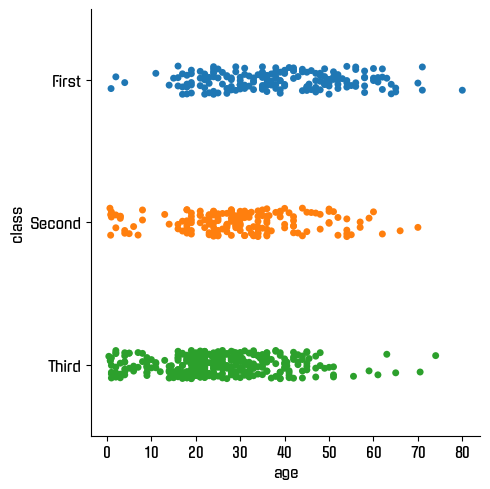

In [68]:
##kind를 선택않고 catplot()의 결과 -> jittere strip plot의 결과 얻음
##jittered strip plot은 각 축을 기준으로 데이터 분포를 점으로 표현
##점들이 최대한 겹치지 않게 세로 방향으로 무작위로 위치를 찍어줌
df = sns.load_dataset("titanic")
sns.catplot(data = df, x ="age", y = "class")

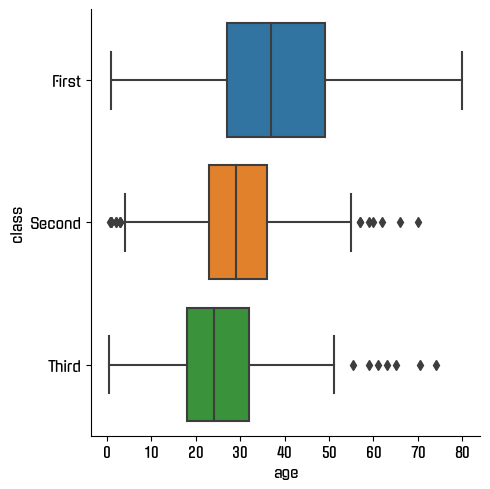

In [69]:
##kind 키워드 인수에 box라는 문자열 전달 -> 박스플롯 표현
sns.catplot(data = df, x ="age", y = "class", kind = "box")

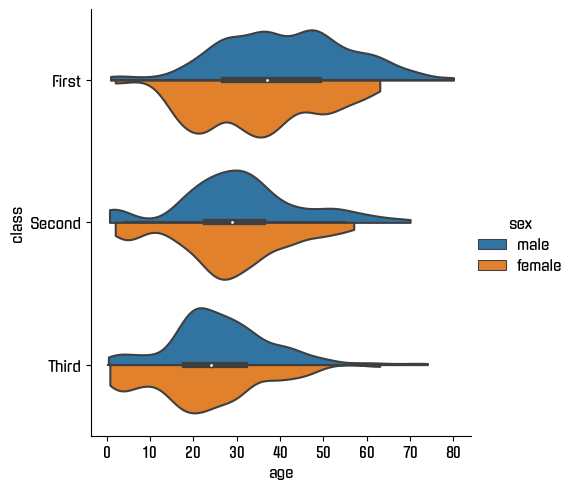

In [71]:
##kind를 violin으로 하면 커널 밀도 히스토그램 그려줌
sns.catplot(data = df, x ="age", y = "class", hue = "sex",
            kind = "violin", bw = .25, cut = 0, split = True, #cut -> 0이면 0부터 값 표현해줘
)

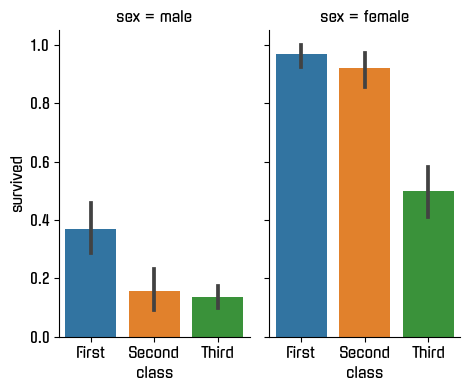

In [72]:
##kind를 bar plot으로
##axes가 2개인것처럼 표현 됨
##col 키워드 인수에 sex 칼럼 네임을 설정 -> sex 분류에 따라 그래프가 col단위로 쪼개짐 -> 그래서 axes-level 단위로 분류가능하다고 하는 것임임
sns.catplot(data = df, x ="class", y = "survived", col = "sex",
            kind = "bar", height=4, aspect = .6)

<AxesSubplot:xlabel='age', ylabel='class'>

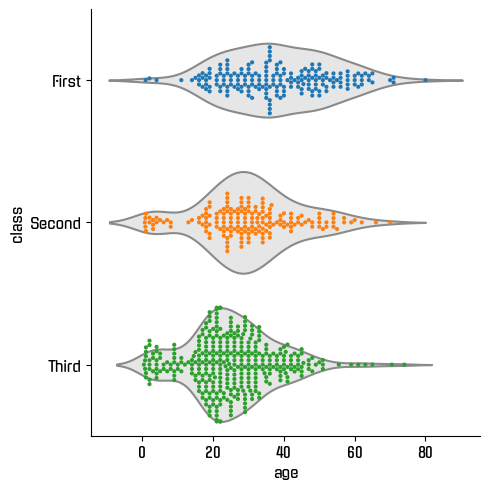

In [73]:
##연속해서 그리프를 그리는 메서드를 여러 차례 사용 -> 그래프 레이터가 겹쳐서 보이게 됨
##swarm : 완전히 겹치지 않게 병렬로 점을 찍어 표현 
##jittered strip plot : 병렬한 방향이지만 정해진 범위내에 랜덤, 최대한 겹치지 않게


sns.catplot(data = df, x ="age", y = "class", kind = "violin", color = ".9", inner=None)
sns.swarmplot(data = df, x ="age", y = "class", size = 3)

In [ ]:
#jointplot()
##두 개의 변수 분포를 나타낼 때 활용하면 좋음
##히스토그램과 스캐터플롯 동시에 사용


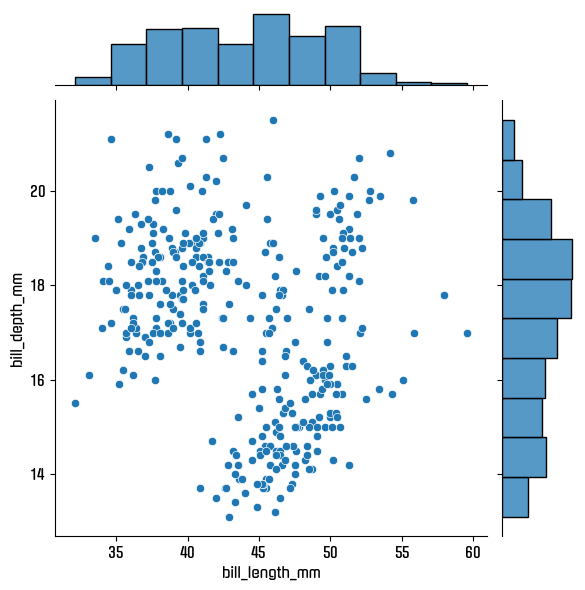

In [77]:
##data키워드 인수로 펭귄의 DF전달
##x에는 DF의 칼럼 네임인 bill_length_mm, y에는 DF의 칼럼네임인 bill_depth_mm을 전달
penguins = sns.load_dataset("penguins")

sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm')

In [ ]:
##히스토플랏과 스캐터플랏을 동시에 사용해서 데이터의 분포를 




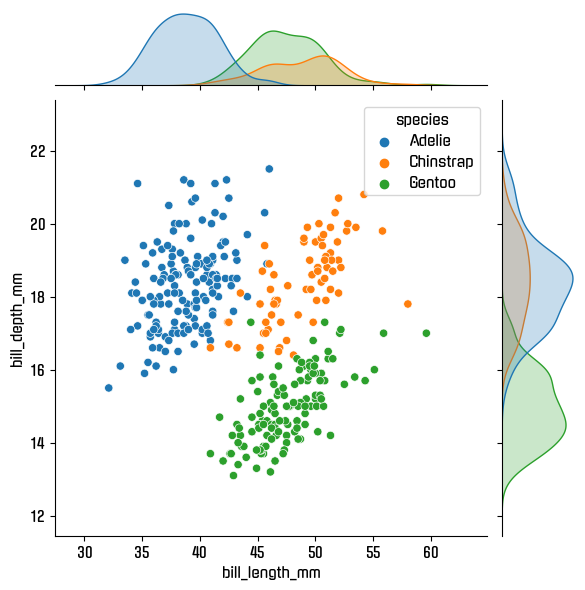

In [78]:
##hue키워드 인수를 활용해 species칼럼에 대한 변수 하나 더 추가
##히스토그램으로 표현된 분포가 자동적으로.............................
sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = "species")

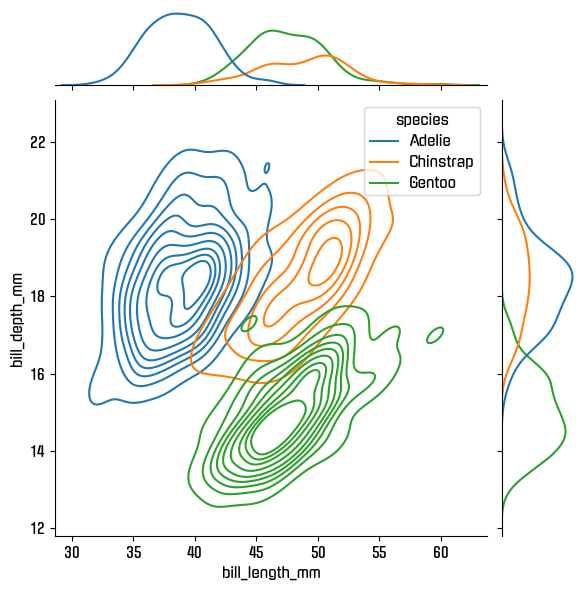

In [79]:
##kind키워드 인수를 하나 추가하고 그 값을 kde로 전달
##스캐터분포가 kde의 형태를 띄면서 값의 밀도가 더 눈에 잘 보이게 변경됨
sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = "species", kind = "kde")

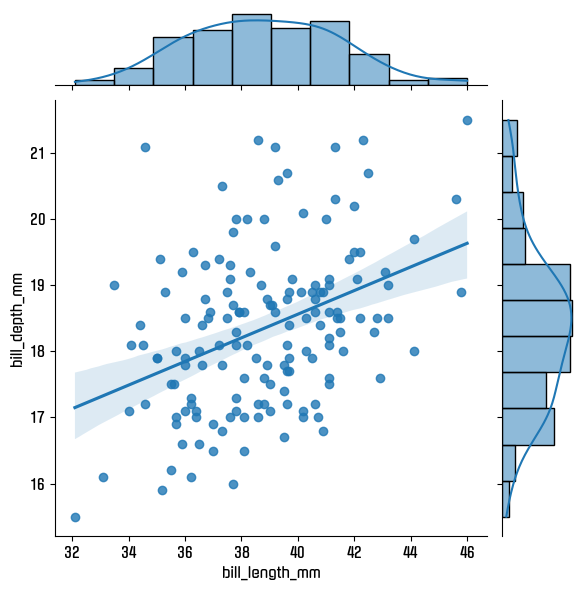

In [80]:
##kind 키워드인수에 reg값 전달 -> 선형회귀에 대한 결과 바로 볼 수 있음
##이 예제는 아델리 펭귄에 대한 데이터를 추린 후 -> 아델리 펭귄의 부리에 대한 선형 결과 구해봄
##hue와 kind='reg'는 동시에 사용될 수 없음

adelie_penguins = penguins[penguins["species"] == "Adelie"]
sns.jointplot(data = adelie_penguins, x = 'bill_length_mm', y = 'bill_depth_mm', kind = "reg")


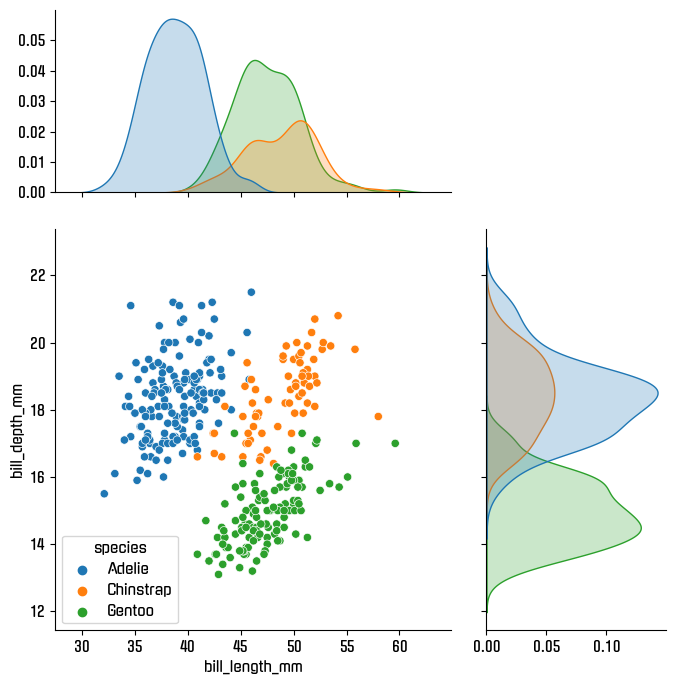

In [82]:
##height(크기), ratio(비율), marginal_ticks 키워드 인수 추가

sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = "species",
             height = 7, ratio = 2, marginal_ticks = True)

In [83]:
#pairplot()
##데이터셋 내의 각 칼럼마다 pair로 경우의 수에 따라 묶음
##결과를 일목요연하게 한번에 확인가능

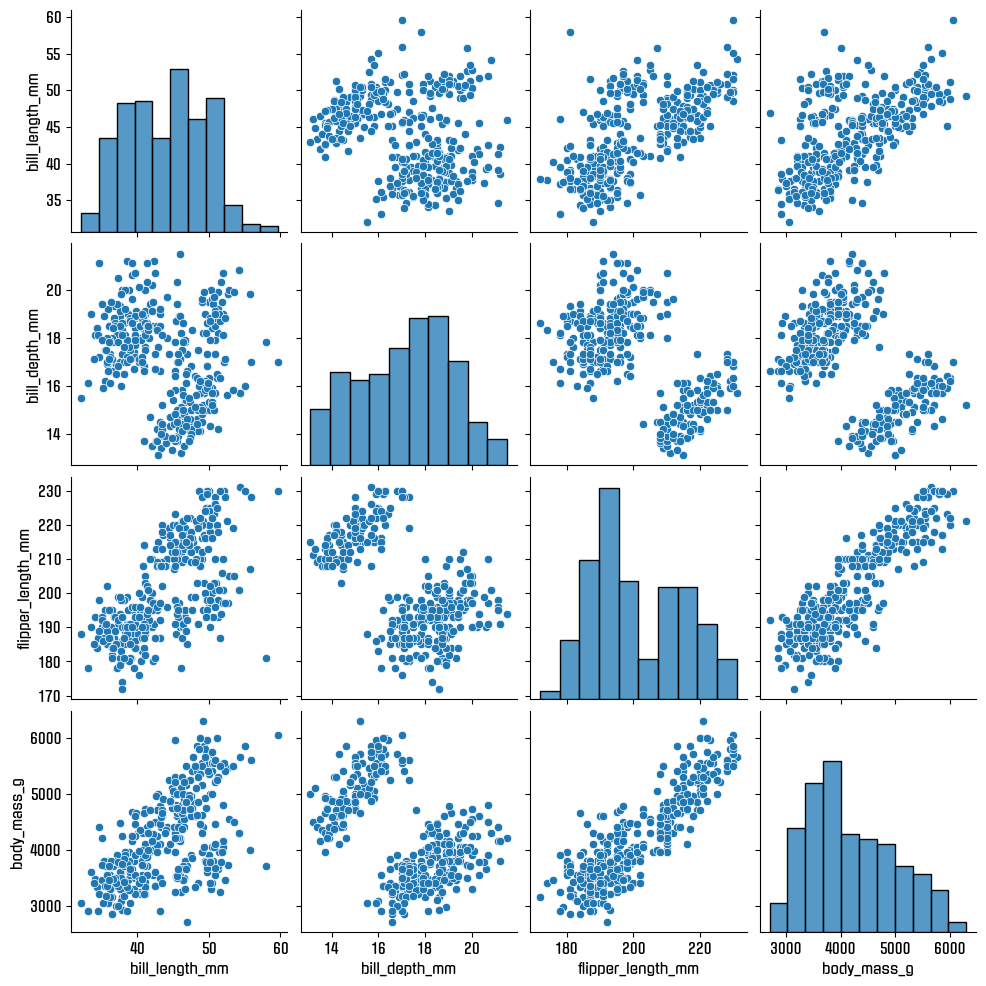

In [84]:
##pairplot()으로 서로 다른 칼럼 간 비교할 때 가장 단순하게 적용하기 좋은 것이 스캐터플롯
##같은 칼럼이 겹치는 위치에는 histplot()의 결과를 보여줌 -> 값의 밀도가 어떻게 되는지 보여줌

sns.pairplot(penguins)

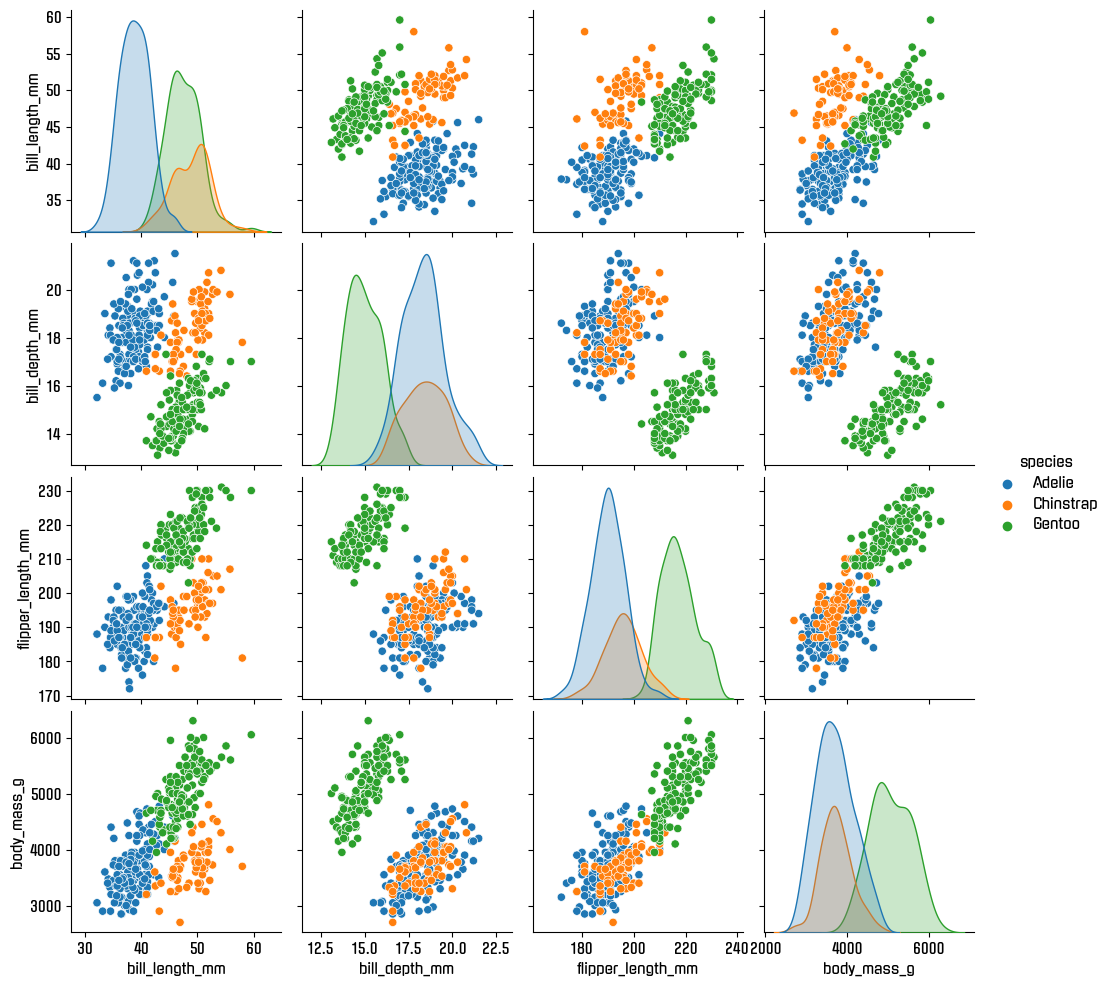

In [85]:
##의미있는 관계롸 엮기 위해 hue키워드 인수에 species를 전달해 펭귄의 종마다 어떤 분포를 갖는지 분류
##join플롯떄와 같게 자동적으로  marginal플롯형태가 kde로변경됨
sns.pairplot(penguins, hue = "species")

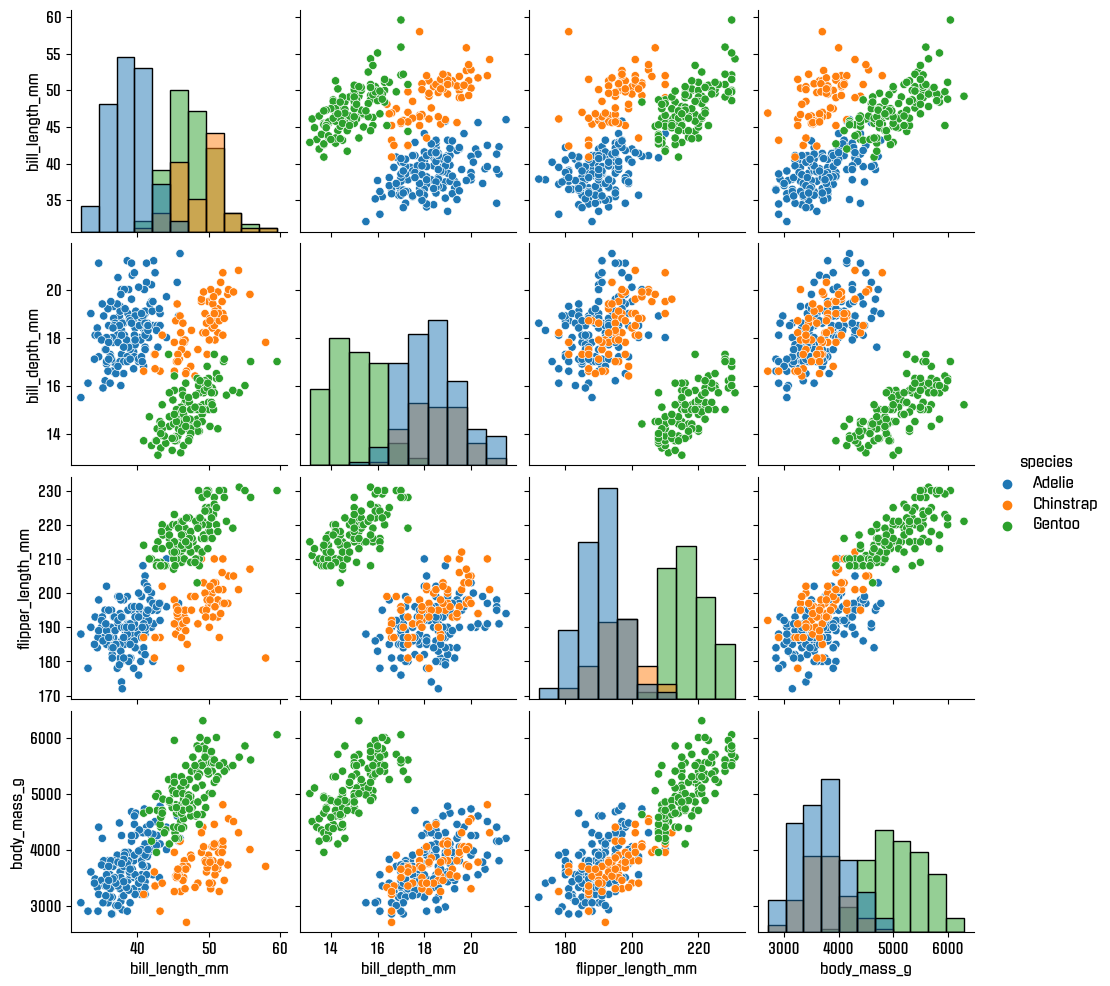

In [86]:
##marginal플롯이 kde가 아닌 히스토그램으로 표현가능
##diag_kind 키워드 인수 사용
##히스토그림을 의미하는 hist문자열을 값으로 전달받기
sns.pairplot(penguins, hue = "species", diag_kind="hist")

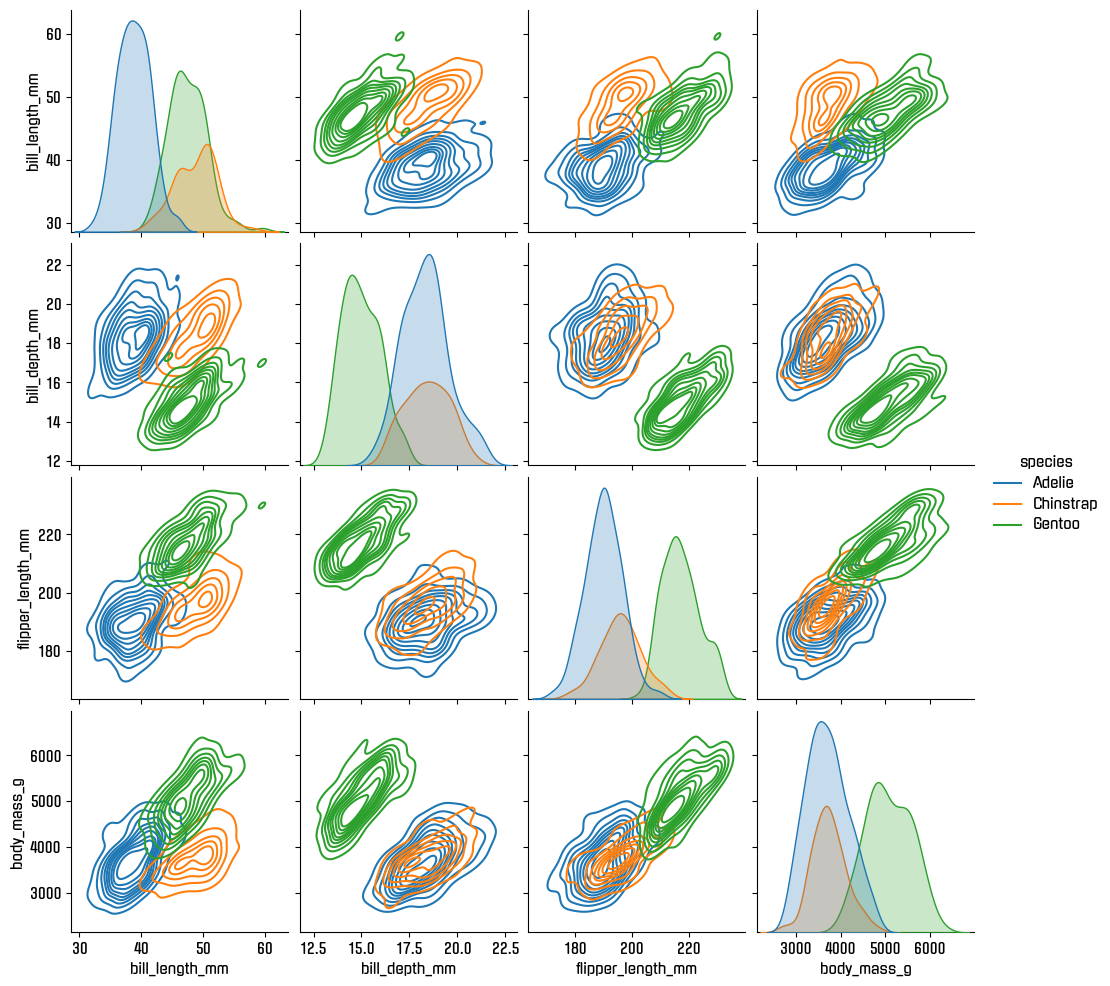

In [87]:
##다른 칼럼과 비교하는 영역의 플롯의 종류도 변경 가능
##kind키워드 인수에 kde전달
##서로다른 칼럼간의 결과를 더 보기좋게 비교가능
sns.pairplot(penguins, hue = "species", kind = "kde")

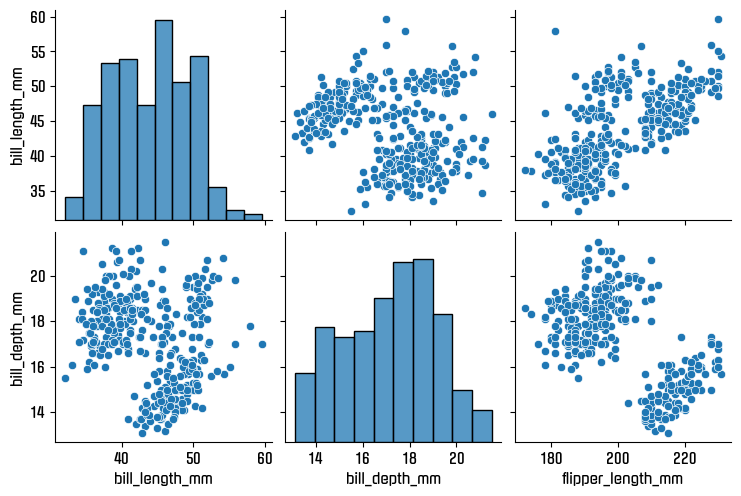

In [88]:
##x_vars, y-vars키워드 인수를 활용해 원하는 칼럼

sns.pairplot(
    penguins,
    x_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars = ["bill_length_mm", "bill_depth_mm"])

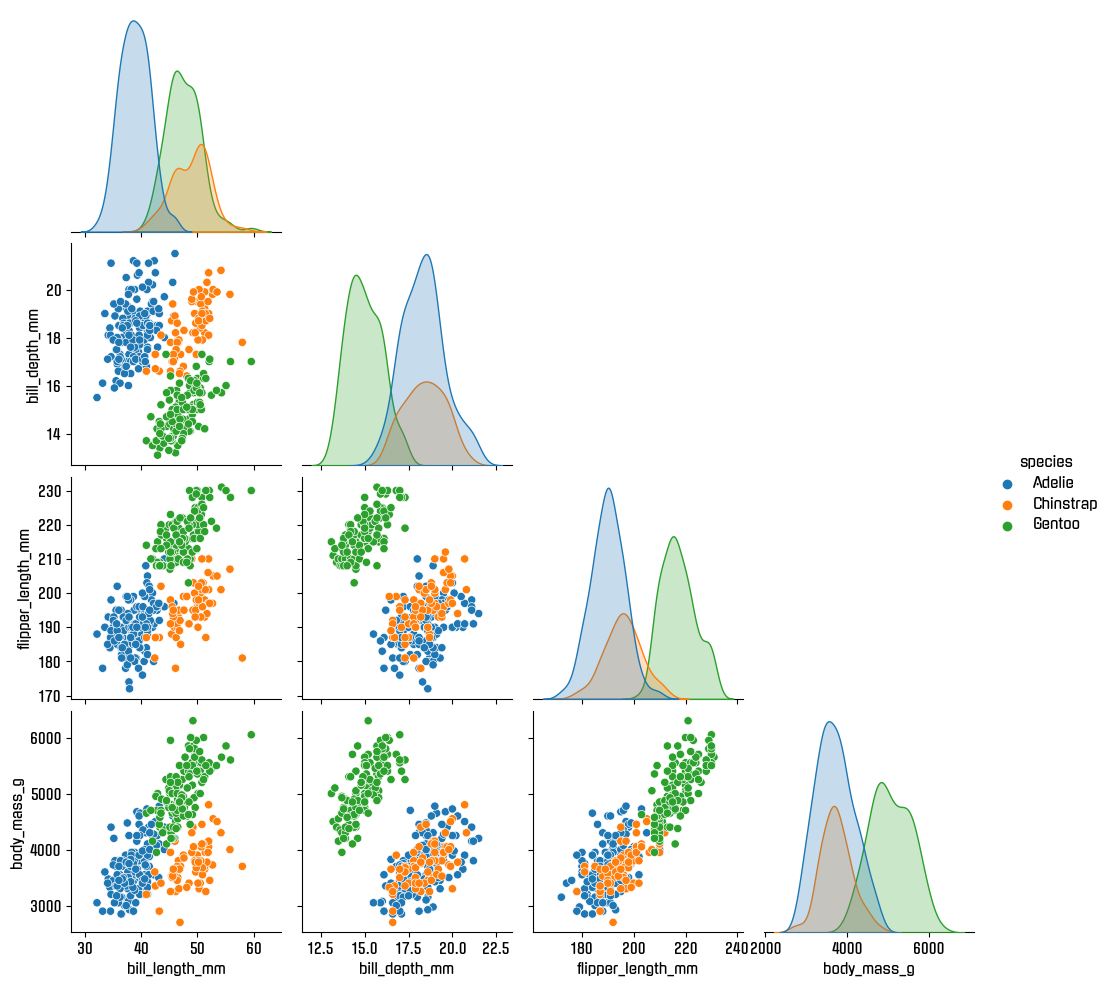

In [89]:
##한 방향으로만 분포를 얻으면 된다! 싶으면 corner 키워드 인수를 True로 설정
##삼각형 모양의 중복없는 결과  얻을 수 있음(축의 방향을 고려하지 않을 떄)
sns.pairplot(penguins, hue = "species", corner = True)

In [ ]:
#pandas pivot table
##데이터 칼럼중에서 두개의 칼럼을 각각 로우인덱스, 칼럼인ㄴ덱스로 사용해 데이터를 조회해 펼친 것

###판다스는 지정된 두 칼럼을 각각 로우인덱스와 칼럼인덱스로 바꾼 후
###로우인덱스의 레이블 값이 첫번쨰 키의 값과 같고
###칼럼 인덱스의 레이블값이 두번째 값과 같은 데이터를 찾아서 해당 칸에 넣는다
### 주어진 데이터가 존재하지 않으면 NaN값 넣음


##피벗테이블을 만들기 위해 pivot_table()메서드 제공
##1번 인수로 DF, 2번 인수로 데이터로 사용할 칼럼 이름, 3번 인수로는 로우 인덱스로 사용할 칼럼네임, 4번 인수로는 칼럼 인덱스로 사용할 칼럼네임
##aggfunc키워드 인자 -> 디폴트 : 평균값


In [93]:
##로우 인덱스로 선실 등급을 나타내는 클래스 칼럼
##칼럼 인덱스로 child, man, woman의 분류를 나누는 카테고리 값인 who를 지정
titanic = sns.load_dataset("titanic")
pd.pivot_table(titanic, "survived", index = "class", columns = "who")

who        child       man     woman
class                               
First   0.833333  0.352941  0.978022
Second  1.000000  0.080808  0.909091
Third   0.431034  0.119122  0.491228

In [95]:
##aggfunc키워드인수를 np.sum으로 전달 하고 있음
##해당하는 칸에 값이 여럿이 올 때 그 값들을 더함
##예제는 class와 who에 따른 생존숫자가 됨

pd.pivot_table(titanic, values = "survived", index = "class", columns = "who", aggfunc = np.sum)

who     child  man  woman
class                    
First       5   42     89
Second     19    8     60
Third      25   38     56

In [96]:
##해당값이 없으면 NaN으로 표현 -> pivot_talbe()메서드 인자 중 fill_value에 값을 전달하면 해당 값이 NaN처리
pd.pivot_table(titanic, values = "survived", index = "class", columns = "deck", aggfunc = np.sum, fill_value = 0)

deck    A   B   C   D   E  F  G
class                          
First   7  35  35  22  18  0  0
Second  0   0   0   3   3  7  0
Third   0   0   0   0   3  1  2

In [ ]:
#heatmap()
## 칼럼의 pair가 모두 카테고리 값이거나, 피봇테이블의 결과를 가지고 히트맵으로 표현하면 각 칼럼간의 상관관계를 짙고 옅음으로 표현 가능


<AxesSubplot:xlabel='who', ylabel='class'>

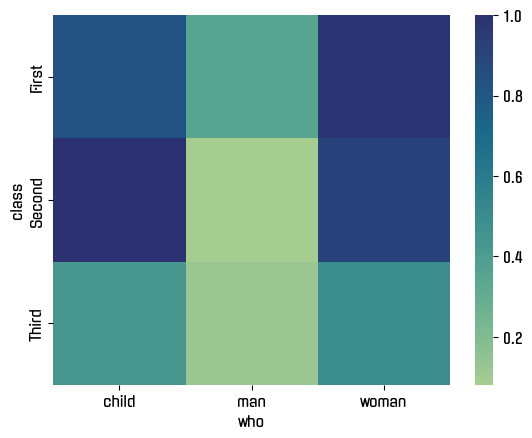

In [99]:
##피봇테이블 히트맵()의 인수로 전달
##cmap -> crest테마 적용
##짙은 푸른빛을 띌수록 생존율 높고, 노란빛을 띌수록 생존율 낮음
ttn_cls_who = pd.pivot_table(titanic, "survived", index = "class", columns = "who")
sns.heatmap(ttn_cls_who, cmap = "crest")

<AxesSubplot:xlabel='who', ylabel='class'>

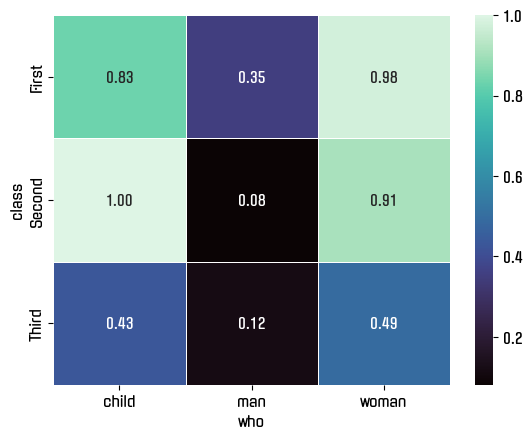

In [100]:
##annot키워드 인수에 True -> cell마다 value표기
##fmt키워드 인수를 사용 -> cell마다 표기한 value의 포맷 지정
##linewidth -> cell간의 구분을 더 명확히
sns.heatmap(ttn_cls_who, cmap = "mako", annot=True, fmt = ".2f", linewidth=.5)